# Instructions for the application part: 

Github Link: https://github.com/JohnLuis07/CMSC-197

# 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("data/Advertising.csv")
data = data.drop(columns = ['Unnamed: 0'])
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# 2

In [5]:
x_scaled = (data - data.mean())/data.std()


In [6]:
x = x_scaled[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

x.head()

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593


# 3

In [8]:
# Convert it into DataFrame with appropriate column names
x_extraColumn_DF = pd.DataFrame(x, columns=['TV', 'Radio', 'Newspaper'])

# Add extra column for Bias
x_extraColumn_DF.insert(0, 'Bias', 1)

# Display the first few rows of the DataFrame
x_extraColumn_DF.head()

,Bias,TV,Radio,Newspaper
0,1,0.967425,0.979066,1.774493
1,1,-1.194379,1.080097,0.667903
2,1,-1.512360,1.524637,1.779084
3,1,0.051919,1.214806,1.283185
4,1,0.393196,-0.839507,1.278593


# 4

In [10]:
# Assuming x_extraColumn_DF is your feature matrix and y is your target
x_train, x_test, y_train, y_test = train_test_split(x_extraColumn_DF, y, test_size=0.15, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", {x_train.shape}, {y_train.shape})
print("Testing set shape:", {x_test.shape}, {y_test.shape})

Training set shape: {(170, 4)} {(170,)}
Testing set shape: {(30, 4)} {(30,)}


# 5

5.1

In [13]:
# Initialize the weights (including bias term)
def initialize_weights():
    np.random.seed(42)  # For reproducibility
    init_w = np.random.uniform(0, 1, 4)  # 4 weights between 0 and 1
    return init_w

5.2

In [15]:
def predict(x, weights):
    return np.dot(x, weights)



5.3

In [17]:
def cost(x, y, weights):
    m = len(y)
    yhat = predict(x, weights)
    cost = (1/(2*m)) * np.sum((yhat-y)**2)
    return cost

5.4

In [19]:
def gradient(x, y, weights):
    m = len(y)
    yhat = predict(x, weights)
    gradient = (1/m) * np.dot(x.T, (yhat - y))
    return gradient
    

5.5

In [21]:
def update_weights(old_weights, learning_rate, gradient):
    new_weights = old_weights - learning_rate * gradient
    return new_weights

5.6

In [23]:
def grad_descent(x, y, learning_rate, iteration_num):
    costs = []
    weights_cont = initialize_weights()  # Initialize weights once before the loop

    for i in range(iteration_num):
        # Compute the cost (assuming predictions are handled inside the cost function)
        computed_cost = cost(x, y, weights_cont)

        # Compute the gradients (assuming predictions are handled inside the gradient function)
        computed_gradient = gradient(x, y, weights_cont)
        
        # Update the weights
        weights_cont = update_weights(weights_cont, computed_gradient, learning_rate)
        # Store the cost after each iteration
        costs.append(computed_cost)

    return costs, weights_cont


# Define the learning rate and number of iterations
learning_rate = 0.01
iteration_num = 1000

# Call the gradient descent function

costs, weights = grad_descent(x_train, y_train, learning_rate, iteration_num)

# Print the final cost and weights
print('Final Cost: ', costs[-20:])  # Show the last 20 cost values
print('Final Weights: ', weights)



        

Final Cost:  [1.3904882109695738, 1.39048811544133, 1.3904880210595678, 1.3904879278101974, 1.3904878356793064, 1.390487744653162, 1.3904876547182035, 1.390487565861045, 1.3904874780684693, 1.3904873913274274, 1.390487305625036, 1.3904872209485748, 1.390487137285485, 1.3904870546233674, 1.390486972949978, 1.3904868922532303, 1.3904868125211882, 1.3904867337420679, 1.3904866559042326, 1.3904865789961949]
Final Weights:  [14.02423134  3.84751357  2.79507421  0.01984055]


5.7

In [25]:
def plot_costs(costs):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(costs)), costs, label='Cost', color='blue')
    plt.title('Cost vs. Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.legend()
    plt.show()
    

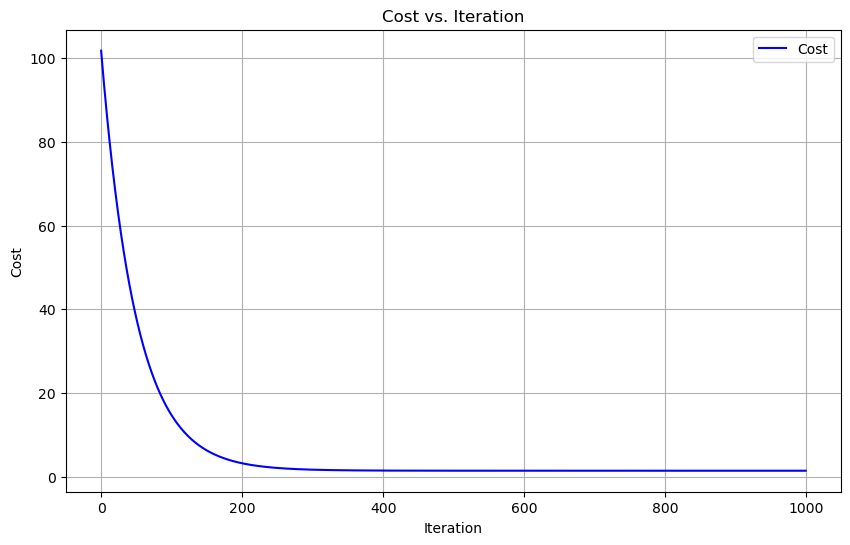

In [26]:
plot_costs(costs)

5.8

In [28]:
# Calculated train cost, already predicted in the cost function
computed_cost_train = cost(x_train, y_train, weights)

print('Computed cost for train set: ', computed_cost_train)




Computed cost for train set:  1.3904865030066105


5.9

In [35]:
# Calculates test cost, already predicted in the cost function
computed_cost_test = cost(x_test, y_test, weights)

print('Computed cost for test set: ', computed_cost_test)

Computed cost for test set:  1.4275233259026485


# 6

In [37]:
# quantitative response y on the train set
MSE_train_set = cost(x_train, y_train, weights)

print(MSE_train_set)

1.3904865030066105


# 7

In [41]:
MSE_test_set = cost(x_test, y_test, weights)

print(MSE_test_set)

1.4275233259026485


# 8

In [47]:
# Calculate mean and standard deviation for original data
x_mean = data[['TV', 'Radio', 'Newspaper']].mean()
x_std = data[['TV', 'Radio', 'Newspaper']].std()

# Revert scaling
x_original = (x * x_std) + x_mean

# Display the original data
print(x_original)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


# Questions

1. What are the optimal weights found by your implemented gradient descent? Plug it into
the linear model:

In [50]:
print('The optimal weights found on my implemented descent are: ', weights)
print(f"hΘ(x) = {weights[0]} + {weights[1]}TV + {weights[2]}Radio + {weights[3]}Newspaper")

The optimal weights found on my implemented descent are:  [14.02423134  3.84751357  2.79507421  0.01984055]
hΘ(x) = 14.024231342255073 + 3.8475135706591597TV + 2.795074211148914Radio + 0.019840545328305034Newspaper


The intercept is 14.024231342255073, this is the base value if TV, Radio, and Newspaper is zero. If no money has been spent on those three then the predicted sales would be 14.024231342255073. There is a 3.8475135706591597 increase on sales in TV whenever it has a unit increase on it, there is a 2.795074211148914 increase on sales in Radio whenever it has a unit increase on it, same goes for the Newspaper, there will be a 0.019840545328305034 increase on sales whenever it has a unit increase on it.

2. Provide a scatter plot of the y_hat 𝑎𝑛𝑑 𝑦 for both the train and test set. Is there a
trend? Provide an r2 score (also available in sklearn).

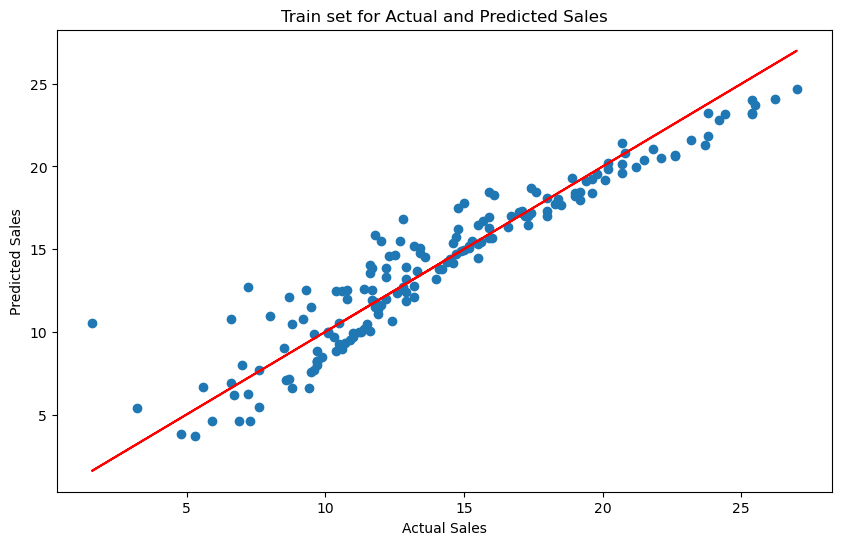

The r2 score in test set:  0.8936788712295599


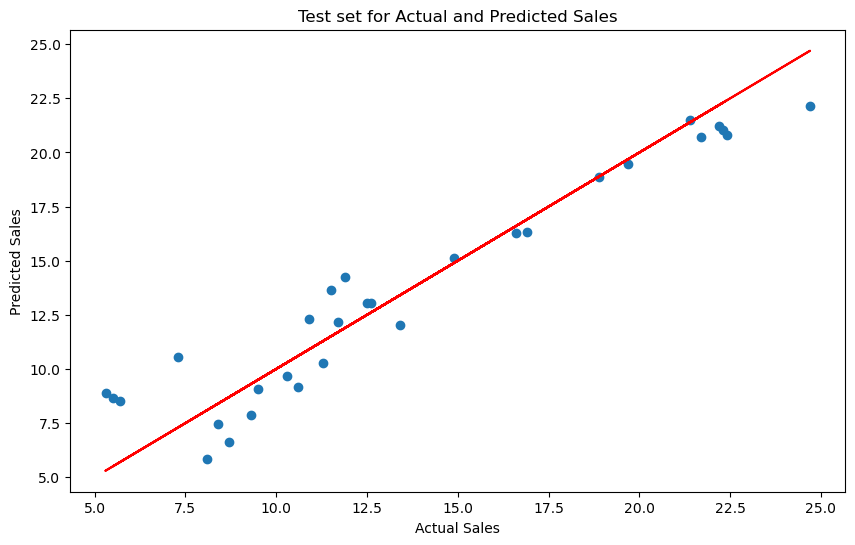

The r2 score in test set:  0.9109978474049424


In [57]:
predicted_train = predict(x_train, weights)
predicted_test = predict(x_test, weights)



plt.figure(figsize=(10, 6))
plt.title('Train set for Actual and Predicted Sales')
plt.scatter(y_train, predicted_train)
plt.plot(y_train, y_train, color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

# Train set r2 score
r2_train_set = r2_score(y_train, predicted_train)
print("The r2 score in test set: ", r2_train_set)

plt.figure(figsize=(10, 6))
plt.title('Test set for Actual and Predicted Sales')
plt.scatter(y_test, predicted_test)
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

# Test set r2 score
r2_test_set = r2_score(y_test, predicted_test)
print("The r2 score in test set: ", r2_test_set)

Since the train and test set shows a linear diagonal pattern, therefore, it also clearly shows that it has a strong trend in terms of linearity. Same goes for the r2 score basis, the train set has a r2 score of 0.8936788712295599 while the test set has a r2 score of 0.9109978474049424 which is greater than 0.8, therefore both train and test set has a strong trend based on their high r2 scores.

# 3

In [62]:
iteration_num = [100, 500, 5000, 10000, 25000, 50000]

# Loop through different iteration counts and evaluate performance
for i in iteration_num:
    # Perform gradient descent with i iterations
    costs, weights = grad_descent(x_train, y_train, learning_rate, i)
    
    # Predict values for both train and test sets
    predicted_train = predict(x_train, weights)
    predicted_test = predict(x_test, weights)

    # Get the final cost (last value in cost_history)
    final_cost = costs[-1]
    
    # Display the current costs and r2 scores
    print(f"Number of Iterations: {i}")
    print(f"Final Cost: {final_cost}")
    print(f"R² Score for {i} iterations (Train): {r2_score(y_train, predicted_train)}")
    print(f"R² Score for {i} iterations (Test): {r2_score(y_test, predicted_test)}\n")

Number of Iterations: 100
Final Cost: 14.901887328993132
R² Score for 100 iterations (Train): -0.11879636409861871
R² Score for 100 iterations (Test): 0.10399571585232603

Number of Iterations: 500
Final Cost: 1.3966127742864711
R² Score for 500 iterations (Train): 0.8932184490117522
R² Score for 500 iterations (Test): 0.9099778107556373

Number of Iterations: 5000
Final Cost: 1.3904801309297574
R² Score for 5000 iterations (Train): 0.8936793584593188
R² Score for 5000 iterations (Test): 0.9110275702091689

Number of Iterations: 10000
Final Cost: 1.3904801309297574
R² Score for 10000 iterations (Train): 0.8936793584593188
R² Score for 10000 iterations (Test): 0.9110275702091717

Number of Iterations: 25000
Final Cost: 1.3904801309297574
R² Score for 25000 iterations (Train): 0.8936793584593188
R² Score for 25000 iterations (Test): 0.9110275702091717

Number of Iterations: 50000
Final Cost: 1.3904801309297574
R² Score for 50000 iterations (Train): 0.8936793584593188
R² Score for 50000 i

As the number of iteration increases, the final cost decreases which is inverse in the r2 scores for the both train and test set that increases whenever the iteration increase. The cost from 100 to 500 are stable however if it goes to 5000 iteration above, the cost remain constant,for the R2 scores for both train and test set, it only becomes stable and constant once it raches 10000.

# 4


Learning Rate: 0.1, Final Cost: 1.3904801309297572
Learning Rate: 0.01, Final Cost: 1.3904865789961949
Learning Rate: 0.001, Final Cost: 14.780871493928169
Learning Rate: 0.0001, Final Cost: 83.43290474209937
Learning Rate: 0.2, Final Cost: 1.3904801309297574


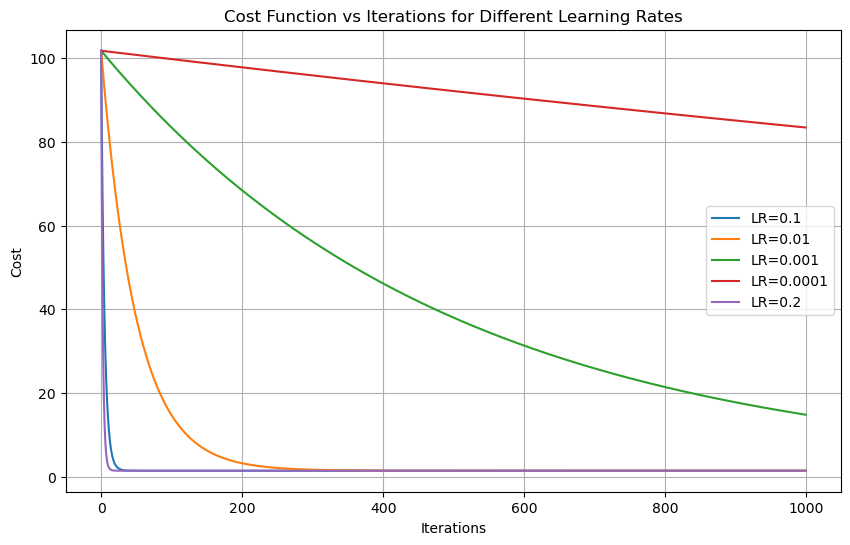

In [68]:
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]
iteration_num = 1000 

# List to store cost history for each learning rate
cost_histories = []

# Loop through different learning rates and apply gradient descent
for i in learning_rates:
    costs, weights = grad_descent(x_train, y_train, i, iteration_num)
    
    # Append the cost history for the current learning rate to the list
    cost_histories.append(costs)
    
    # Print final cost for each learning rate (optional)
    print(f"Learning Rate: {i}, Final Cost: {costs[-1]}")

# Plot the cost function vs iterations for each learning rate
plt.figure(figsize=(10, 6))

# Plot the learning rates and its corresponding final costs
for i, j in enumerate(learning_rates):
    plt.plot(range(iteration_num), cost_histories[i], label=f'LR={j}')

plt.title('Cost Function vs Iterations for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

In higher learning rates such as the 0.2 and 0.2, the final costs are low. It also suggest that this rates are good for minimizing the cost function but it may have a risk for instability, for the learning rate 0.01, the final cost is slightly higher than the 0.1 and 0.2 which shows a good convergence pattern, therefore this rate is still effective for minimizing the cost function. The learning rate 0.0001 and 0.001 has the highest final costs among the others which has more gradual convergence and has a lower iteration instability.

# 5

Yes, there is an inverse relationship between the two, while the Learning rate increases the final costs decreases, while the learning rate decreases, the final costs increases. The relationship can affect the convergence behavior and stability. For the convergence behavior, it can affect its speed. The higher the learning rates the faster the converge, the lower the learning rates, the slower the speed, and for stability while the iterations are going higher and higher, it goes stable or maybe becomes constant once it reaches much higher iterations. 

# 6

In [74]:
# Fit the OLS model
ols_model = LinearRegression()
ols_model.fit(x_train.iloc[:, 1:], y_train) # Do not include Bias column

# Get OLS predictions
ols_train_predictions = ols_model.predict(x_train.iloc[:, 1:])
ols_test_predictions = ols_model.predict(x_test.iloc[:, 1:])

# Calculate OLS R2 Scores
ols_train_r2 = r2_score(y_train, ols_train_predictions)
ols_test_r2 = r2_score(y_test, ols_test_predictions)

# Calculate OLS MSE
ols_train_mse = mean_squared_error(y_train, ols_train_predictions)
ols_test_mse = mean_squared_error(y_test, ols_test_predictions)

# Display OLS results
print(f"OLS Train Set R2 Score: {ols_train_r2}")
print(f"OLS Test Set R2 Score: {ols_test_r2}")


# Display Gradient Descent results
print(f"Gradient Descent Train Set R2 Score: {r2_train_set}")
print(f"Gradient Descent Test Set R2 Score: {r2_test_set}")


OLS Train Set R2 Score: 0.8936793584593188
OLS Test Set R2 Score: 0.9110275702091712
Gradient Descent Train Set R2 Score: 0.8936788712295599
Gradient Descent Test Set R2 Score: 0.9109978474049424


Gradient Descent r2 is better than OLS r2 as it has a higher score for both training and test set but they both close to each other.